Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999


In [7]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

local_zip = 'happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("h-or-s")
zip_ref.close()

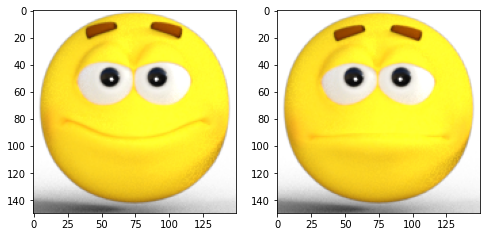

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

f, ax = plt.subplots(1,2,figsize=(8,5))
img1 = mpimg.imread('h-or-s/happy/happy1-00.png')
img2 = mpimg.imread('h-or-s/sad/sad1-00.png')
ax[0].imshow(img1)
ax[1].imshow(img2)
plt.show()

In [17]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_happy_sad_model():

    #Define callback and accuracy
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('accuracy') > DESIRED_ACCURACY):
                print(f"\nReached {DESIRED_ACCURACY} accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
    
    #Model definition
    model = tf.keras.models.Sequential([
        
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    #Select optimizer, loss and metric
    model.compile(optimizer = RMSprop(lr = 0.001), loss = 'binary_crossentropy',metrics = ['accuracy'])

    #Create image generator to input images from folder to model.
    train_datagen = ImageDataGenerator(rescale=1/255)
    train_generator = train_datagen.flow_from_directory('h-or-s/',  #Directory with folders of each class
                                                        target_size=(150, 150), 
                                                        batch_size=1,
                                                        class_mode='binary')
    #Train the model
    history = model.fit_generator(train_generator,
                                  steps_per_epoch=12,  
                                  epochs=15,
                                  callbacks=[callbacks])

    return history.history['accuracy'][-1]

In [18]:
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/15
12/12 [==============================] - 1s 87ms/step - loss: 4.6499 - accuracy: 0.6667
Epoch 2/15
12/12 [==============================] - 1s 89ms/step - loss: 0.8463 - accuracy: 0.4167
Epoch 3/15
12/12 [==============================] - 1s 88ms/step - loss: 0.7406 - accuracy: 0.8333
Epoch 4/15
12/12 [==============================] - 1s 87ms/step - loss: 0.7578 - accuracy: 0.6667
Epoch 5/15
12/12 [==============================] - 1s 88ms/step - loss: 0.4512 - accuracy: 0.7500
Epoch 6/15
12/12 [==============================] - ETA: 0s - loss: 0.1168 - accuracy: 1.0000
Reached 0.999 accuracy so cancelling training!
12/12 [==============================] - 1s 87ms/step - loss: 0.1168 - accuracy: 1.0000


1.0